#Overview

- Calculate confidence intervals of difference sizes around an estimate.
- Understand that a confidence interval is a random interval with the given probability of falling on top of the parameter.
- Explain the concept of "power" as it relates to inference.
- Understand the relationship between p-values and confidence intervals and explain why reporting confidence intervals is often preferable.

###1. Confidence Intervals

- We can use statistical theory to compute the probability that a given interval contains the true parameter  $p$ .
- 95% confidence intervals are intervals constructed to have a 95% chance of including  $p$ . The margin of error is approximately a 95% confidence interval.
- The start and end of these confidence intervals are random variables.
- To calculate any size confidence interval, we need to calculate the value  $z$  for which  $Pr(−z≤Z≤z)$  equals the desired confidence. For example, a 99% confidence interval requires calculating  $z$  for  $Pr(−z≤Z≤z)=0.99$ .
- For a confidence interval of size  $q$ , we solve for  $z=1−\frac{1-q}{2}$ .
To determine a 95% confidence interval, use $z <- qnorm(0.975)$. This value is slightly smaller than 2 times the standard error.

*Code: geom_smooth confidence interval example*

The shaded area around the curve is related to the concept of confidence intervals.

[1] "nhtemp"

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



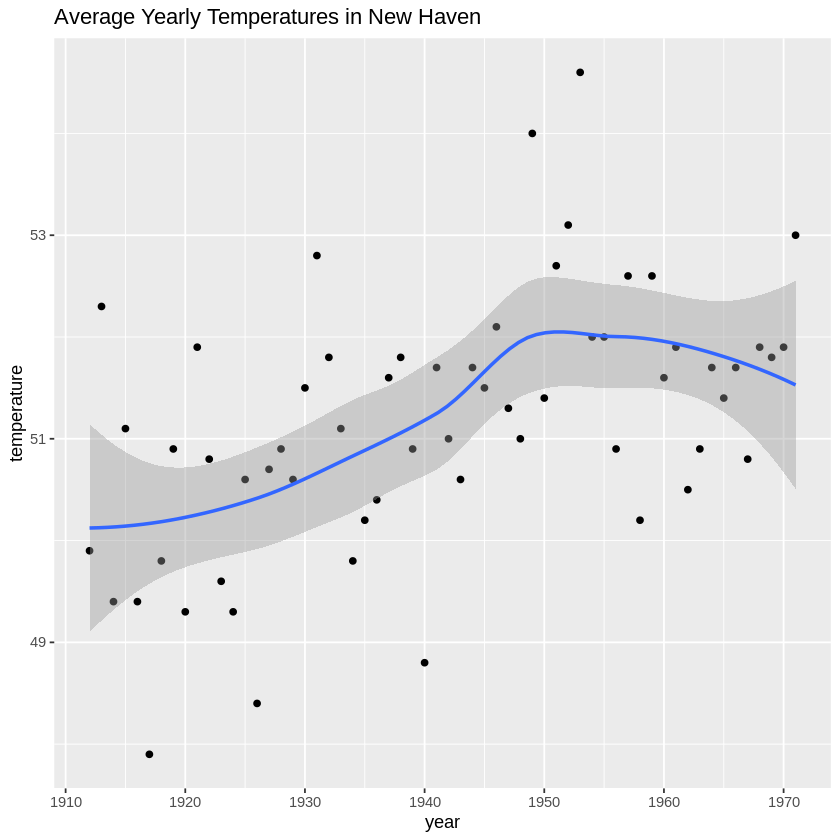

In [33]:
data("nhtemp")
head(data("nhtemp"))
data.frame(year = as.numeric(time(nhtemp)), temperature = as.numeric(nhtemp)) %>%
    ggplot(aes(year, temperature)) +
    geom_point() +
    geom_smooth() +
    ggtitle("Average Yearly Temperatures in New Haven")

Code: Monte Carlo simulation of confidence intervals

Note that to compute the exact 95% confidence interval, we would use qnorm(.975)xSE_hat instead of 2xSE_hat.

In [34]:
p <- 0.45
N <- 1000
X <- sample(c(0,1), size = N, replace = TRUE, prob = c(1-p, p))    # generate N observations
X_hat <- mean(X)    # calculate X_hat
SE_hat <- sqrt(X_hat*(1-X_hat)/N)    # calculate SE_hat, SE of the mean of N observations
c(X_hat - 2*SE_hat, X_hat + 2*SE_hat)    # build interval of 2*SE above and below mean

[1] 0.4135691 0.4764309

Code: Solving for  z  with qnorm

In [35]:
z <- qnorm(0.995)    # calculate z to solve for 99% confidence interval
pnorm(qnorm(0.995))    # demonstrating that qnorm gives the z value for a given probability
pnorm(qnorm(1-0.995))    # demonstrating symmetry of 1-qnorm
pnorm(z) - pnorm(-z)    # demonstrating that this z value gives correct probability for interval

[1] 0.995

[1] 0.005

[1] 0.99

##2. A Monte Carlo Simulation for Confidence Intervals

- We can run a Monte Carlo simulation to confirm that a 95% confidence interval contains the true value of  $p$  95% of the time.

- A plot of confidence intervals from this simulation demonstrates that most intervals include  $p$ , but roughly 5% of intervals miss the true value of  $p$ .

Code: Monte Carlo simulation
Note that to compute the exact 95% confidence interval, we would use qnorm(.975)xSE_hat instead of 2xSE_hat.

In [36]:
B <- 10000
inside <- replicate(B, {
    X <- sample(c(0,1), size = N, replace = TRUE, prob = c(1-p, p))
    X_hat <- mean(X)
    SE_hat <- sqrt(X_hat*(1-X_hat)/N)
    between(p, X_hat - 2*SE_hat, X_hat + 2*SE_hat)    # TRUE if p in confidence interval
})
mean(inside)

[1] 0.9566

##3. The Correct Language

- The 95% confidence intervals are random, but  p  is not random.
- 95% refers to the probability that the random interval falls on top of  p .
- It is technically incorrect to state that  p  has a 95% chance of being in between two values because that implies  p  is random.

##4. Power

- If we are trying to predict the result of an election, then a confidence interval that includes a spread of 0 (a tie) is not helpful.
- A confidence interval that includes a spread of 0 does not imply a close election, it means the sample size is too small.
- $Power$ is the probability of detecting an effect when there is a true effect to find. Power increases as sample size increases, because larger sample size means smaller standard error.

Code: Confidence interval for the spread with sample size of 25

Note that to compute the exact 95% confidence interval, we would use c(-qnorm(.975), qnorm(.975)) instead of 1.96.


In [37]:
N <- 25
X_hat <- 0.48
(2*X_hat - 1) + c(-2, 2)*2*sqrt(X_hat*(1-X_hat)/N)

[1] -0.4396799  0.3596799

##5. p-**Values**

- The null hypothesis is the hypothesis that there is no effect. In this case, the null hypothesis is that the spread is 0, or  p=0.5 .

- The p-value is the probability of detecting an effect of a certain size or larger when the null hypothesis is true.
- We can convert the probability of seeing an observed value under the null hypothesis into a standard normal random variable. We compute the value of  z  that corresponds to the observed result, and then use that  z  to compute the p-value.
- If a 95% confidence interval does not include our observed value, then the p-value must be smaller than 0.05.
- It is preferable to report confidence intervals instead of p-values, as confidence intervals give information about the size of the estimate and p-values do not.

Code: Computing a p-value for observed spread of 0.02

In [39]:
N <- 100    # sample size
z <- sqrt(N) * 0.02/0.5    # spread of 0.02
z
1 - (pnorm(z) - pnorm(-z))

[1] 0.4

[1] 0.6891565

##6. Another Explanation of p-Values

# Assessment 3.1

Exercise 1. Confidence interval for p

- Use $filter$ to subset the data set for the poll data you want. Include polls that ended on or after October 31, 2016 ($enddate$). Only include polls that took place in the United States. Call this filtered object $polls$.
- Use $nrow$ to make sure you created a filtered object $polls$ that contains the correct number of rows.
- Extract the sample size $N$ from the first poll in your subset object $polls$.
- Convert the percentage of Clinton voters ($rawpoll_clinton$) from the first poll in polls to a proportion,X_hat. Print this value to the console.
- Find the standard error of X_hat given N. Print this result to the console.
- Calculate the 95% confidence interval of this estimate using the qnorm function.
- Save the lower and upper confidence intervals as an object called ci. Save the lower confidence interval first

In [47]:
  install.packages("dslabs")
  library(dslabs)
  data("polls_us_election_2016")
  # Load the data
  data(polls_us_election_2016)
  # Generate an object `polls` that contains data filtered for polls that ended on or after October 31, 2016 in the United States
  polls <- filter(polls_us_election_2016, enddate >= "2016-10-31" & state == "U.S.")
  
  # How many rows does `polls` contain? Print this value to the console.
  nrow(polls)
  # Assign the sample size of the first poll in `polls` to a variable called `N`. Print this value to the console.
  N <- head(polls$samplesize,1)
  N
  
  
  # For the first poll in `polls`, assign the estimated percentage of Clinton voters to a variable called `X_hat`. Print this value to the console.
  X_hat <- (head(polls$rawpoll_clinton,1)/100)
  X_hat
  
  # Calculate the standard error of `X_hat` and save it to a variable called `se_hat`. Print this value to the console.
  se_hat <- sqrt(X_hat*(1-X_hat)/N)
  se_hat
  
  # Use `qnorm` to calculate the 95% confidence interval for the proportion of Clinton voters. Save the lower and then the upper confidence interval to a variable called `ci`.
  qnorm(0.975)
  ci <- c(X_hat - qnorm(0.975)*se_hat, X_hat + qnorm(0.975)*se_hat)
  ci


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] 70

[1] 2220

[1] 0.47

[1] 0.01059279

[1] 1.959964

[1] 0.4492385 0.4907615

Exercise 2. Pollster results for p

Create a new object called pollster_results that contains the pollster's name, the end date of the poll, the proportion of voters who declared a vote for Clinton, the standard error of this estimate, and the lower and upper bounds of the confidence interval for the estimate.

In [50]:
# The `polls` object that filtered all the data by date and nation has already been loaded. Examine it using the `head` function.
#head(polls)

# Create a new object called `pollster_results` that contains columns for pollster name, end date, X_hat, se_hat, lower confidence interval, and upper confidence interval for each poll.
polls <- mutate(polls, X_hat = polls$rawpoll_clinton/100, se_hat = sqrt(X_hat*(1-X_hat)/polls$samplesize), lower = X_hat - qnorm(0.975)*se_hat, upper = X_hat + qnorm(0.975)*se_hat)
pollster_results <- select(polls, pollster, enddate, X_hat, se_hat, lower, upper)
head(pollster_results)

,pollster,enddate,X_hat,se_hat,lower,upper
,<fct>,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,ABC News/Washington Post,2016-11-06,0.4700,0.010592790,0.4492385,0.4907615
2,Google Consumer Surveys,2016-11-07,0.3803,0.002978005,0.3744632,0.3861368
3,Ipsos,2016-11-06,0.4200,0.010534681,0.3993524,0.4406476
4,YouGov,2016-11-07,0.4500,0.008204286,0.4339199,0.4660801
5,Gravis Marketing,2016-11-06,0.4700,0.003869218,0.4624165,0.4775835
6,Fox News/Anderson Robbins Research/Shaw & Company Research,2016-11-06,0.4800,0.013883131,0.4527896,0.5072104


Exercise 3. Comparing to actual results - p

The final tally for the popular vote was Clinton 48.2% and Trump 46.1%. Add a column called $hit$ to pollster_results that states if the confidence interval included the true proportion p=0.482 or not. What proportion of confidence intervals included p?

In [51]:
# The `pollster_results` object has already been loaded. Examine it using the `head` function.
head(pollster_results)

# Add a logical variable called `hit` that indicates whether the actual value exists within the confidence interval of each poll. Summarize the average `hit` result to determine the proportion of polls with confidence intervals include the actual value. Save the result as an object called `avg_hit`.
avg_hit <- pollster_results %>% mutate(hit=(lower<0.482 & upper>0.482)) %>% summarize(mean(hit))
avg_hit

,pollster,enddate,X_hat,se_hat,lower,upper
,<fct>,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,ABC News/Washington Post,2016-11-06,0.4700,0.010592790,0.4492385,0.4907615
2,Google Consumer Surveys,2016-11-07,0.3803,0.002978005,0.3744632,0.3861368
3,Ipsos,2016-11-06,0.4200,0.010534681,0.3993524,0.4406476
4,YouGov,2016-11-07,0.4500,0.008204286,0.4339199,0.4660801
5,Gravis Marketing,2016-11-06,0.4700,0.003869218,0.4624165,0.4775835
6,Fox News/Anderson Robbins Research/Shaw & Company Research,2016-11-06,0.4800,0.013883131,0.4527896,0.5072104


mean(hit)
<dbl>
0.3142857


Exercise 4. Theory of confidence intervals

If these confidence intervals are constructed correctly, and the theory holds up, what proportion of confidence intervals should include p?

0.95

Exercise 5. Confidence interval for d

A much smaller proportion of the polls than expected produce confidence intervals containing p. Notice that most polls that fail to include p are underestimating. The rationale for this is that undecided voters historically divide evenly between the two main candidates on election day.

In this case, it is more informative to estimate the spread or the difference between the proportion of two candidates d, or 0.482-0.461 =0.021 for this election.

Assume that there are only two parties and that d= 2p-1. Construct a 95% confidence interval for difference in proportions on election night.

In [53]:
# Add a statement to this line of code that will add a new column named `d_hat` to `polls`. The new column should contain the difference in the proportion of voters.
polls <- polls_us_election_2016 %>% filter(enddate >= "2016-10-31" & state == "U.S.") %>%
  mutate(d_hat = rawpoll_clinton/100 - rawpoll_trump/100)


# Assign the sample size of the first poll in `polls` to a variable called `N`. Print this value to the console.
N <- polls$samplesize[1]

# Assign the difference `d_hat` of the first poll in `polls` to a variable called `d_hat`. Print this value to the console.
d_hat <- polls$d_hat[1]
d_hat

# Assign proportion of votes for Clinton to the variable `X_hat`.
X_hat <- (d_hat+1)/2

# Calculate the standard error of the spread and save it to a variable called `se_hat`. Print this value to the console.
se_hat <- 2*sqrt(X_hat*(1-X_hat)/N)
se_hat


# Use `qnorm` to calculate the 95% confidence interval for the difference in the proportions of voters. Save the lower and then the upper confidence interval to a variable called `ci`.
ci <- c(d_hat - qnorm(0.975)*se_hat, d_hat + qnorm(0.975)*se_hat)

[1] 0.04

[1] 0.02120683

Exercise 6. Pollster results for d

Create a new object called pollster_results that contains the pollster's name, the end date of the poll, the difference in the proportion of voters who declared a vote either, and the lower and upper bounds of the confidence interval for the estimate.

In [55]:
# The subset `polls` data with 'd_hat' already calculated has been loaded. Examine it using the `head` function.
head(polls)

# Create a new object called `pollster_results` that contains columns for pollster name, end date, d_hat, lower confidence interval of d_hat, and upper confidence interval of d_hat for each poll.
pollster_results <- polls %>% mutate(X_hat = (d_hat + 1) / 2) %>% mutate(se_hat = 2 * sqrt(X_hat * (1 - X_hat) / samplesize)) %>% mutate(lower = d_hat - qnorm(0.975) * se_hat) %>% mutate(upper = d_hat + qnorm(0.975) * se_hat) %>% select(pollster, enddate, d_hat, lower, upper)
head(pollster_results)

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,d_hat
,<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.00,43.00,4.00,NA,45.20163,41.72430,4.626221,NA,0.0400
2,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574,lv,38.03,35.69,5.46,NA,43.34557,41.21439,5.175792,NA,0.0234
3,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.00,39.00,6.00,NA,42.02638,38.81620,6.844734,NA,0.0300
4,U.S.,2016-11-04,2016-11-07,YouGov,B,3677,lv,45.00,41.00,5.00,NA,45.65676,40.92004,6.069454,NA,0.0400
5,U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639,rv,47.00,43.00,3.00,NA,46.84089,42.33184,3.726098,NA,0.0400
6,U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48.00,44.00,3.00,NA,49.02208,43.95631,3.057876,NA,0.0400


,pollster,enddate,d_hat,lower,upper
,<fct>,<date>,<dbl>,<dbl>,<dbl>
1,ABC News/Washington Post,2016-11-06,0.0400,-0.001564627,0.08156463
2,Google Consumer Surveys,2016-11-07,0.0234,0.011380104,0.03541990
3,Ipsos,2016-11-06,0.0300,-0.011815309,0.07181531
4,YouGov,2016-11-07,0.0400,0.007703641,0.07229636
5,Gravis Marketing,2016-11-06,0.0400,0.024817728,0.05518227
6,Fox News/Anderson Robbins Research/Shaw & Company Research,2016-11-06,0.0400,-0.014420872,0.09442087


Exercise 7. Comparing to actual results - d

What proportion of confidence intervals for the difference between the proportion of voters included d, the actual difference in election day?

In [56]:
# The `pollster_results` object has already been loaded. Examine it using the `head` function.
head(pollster_results)

# Add a logical variable called `hit` that indicates whether the actual value (0.021) exists within the confidence interval of each poll. Summarize the average `hit` result to determine the proportion of polls with confidence intervals include the actual value. Save the result as an object called `avg_hit`.
avg_hit <- pollster_results %>% mutate(hit=lower <= 0.021 & upper >= 0.021) %>% summarize(mean(hit))

avg_hit

,pollster,enddate,d_hat,lower,upper
,<fct>,<date>,<dbl>,<dbl>,<dbl>
1,ABC News/Washington Post,2016-11-06,0.0400,-0.001564627,0.08156463
2,Google Consumer Surveys,2016-11-07,0.0234,0.011380104,0.03541990
3,Ipsos,2016-11-06,0.0300,-0.011815309,0.07181531
4,YouGov,2016-11-07,0.0400,0.007703641,0.07229636
5,Gravis Marketing,2016-11-06,0.0400,0.024817728,0.05518227
6,Fox News/Anderson Robbins Research/Shaw & Company Research,2016-11-06,0.0400,-0.014420872,0.09442087


mean(hit)
<dbl>
0.7714286


Exercise 8. Comparing to actual results by pollster

Although the proportion of confidence intervals that include the actual difference between the proportion of voters increases substantially, it is still lower that 0.95. In the next chapter, we learn the reason for this.

To motivate our next exercises, calculate the difference between each poll's estimate $\overline{d}$
 and the actual $d=0.021$. Stratify this difference, or error, by pollster in a plot.

,state,startdate,enddate,pollster,grade,samplesize,population,rawpoll_clinton,rawpoll_trump,rawpoll_johnson,rawpoll_mcmullin,adjpoll_clinton,adjpoll_trump,adjpoll_johnson,adjpoll_mcmullin,d_hat
,<fct>,<date>,<date>,<fct>,<fct>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,U.S.,2016-11-03,2016-11-06,ABC News/Washington Post,A+,2220,lv,47.00,43.00,4.00,NA,45.20163,41.72430,4.626221,NA,0.0400
2,U.S.,2016-11-01,2016-11-07,Google Consumer Surveys,B,26574,lv,38.03,35.69,5.46,NA,43.34557,41.21439,5.175792,NA,0.0234
3,U.S.,2016-11-02,2016-11-06,Ipsos,A-,2195,lv,42.00,39.00,6.00,NA,42.02638,38.81620,6.844734,NA,0.0300
4,U.S.,2016-11-04,2016-11-07,YouGov,B,3677,lv,45.00,41.00,5.00,NA,45.65676,40.92004,6.069454,NA,0.0400
5,U.S.,2016-11-03,2016-11-06,Gravis Marketing,B-,16639,rv,47.00,43.00,3.00,NA,46.84089,42.33184,3.726098,NA,0.0400
6,U.S.,2016-11-03,2016-11-06,Fox News/Anderson Robbins Research/Shaw & Company Research,A,1295,lv,48.00,44.00,3.00,NA,49.02208,43.95631,3.057876,NA,0.0400


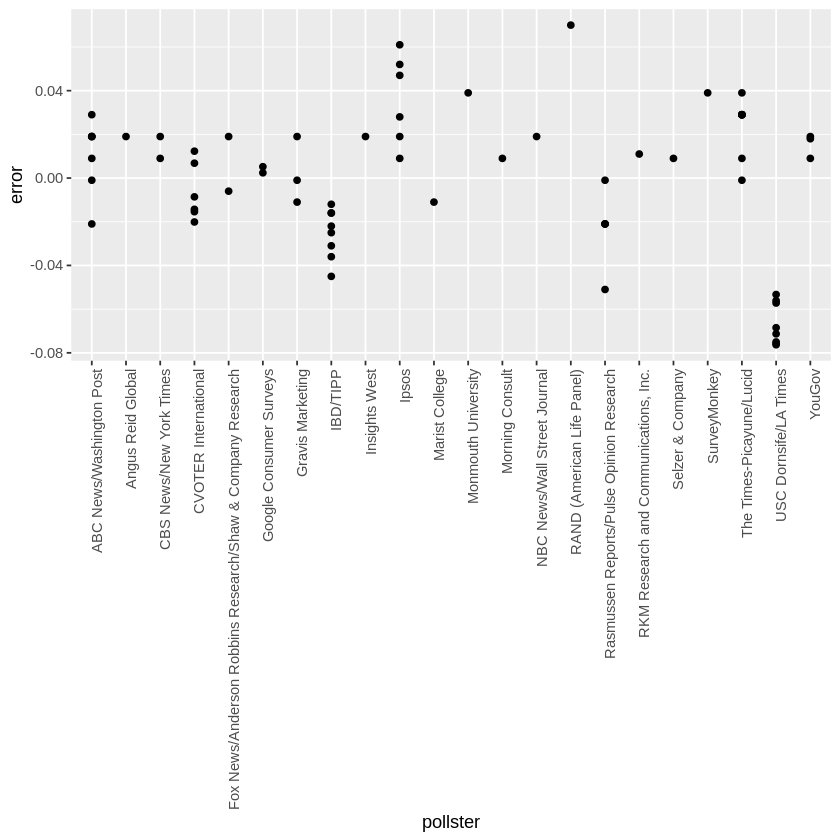

In [57]:
# The `polls` object has already been loaded. Examine it using the `head` function.
head(polls)

# Add variable called `error` to the object `polls` that contains the difference between d_hat and the actual difference on election day. Then make a plot of the error stratified by pollster.
polls %>% 
mutate(error = d_hat - 0.021) %>% 
ggplot(aes(x = pollster, y = error)) + 
geom_point() + 
theme(axis.text.x = element_text(angle = 90, hjust = 1))


Exercise 9. Comparing to actual results by pollster - multiple polls

Remake the plot you made for the previous exercise, but only for pollsters that took five or more polls.

You can use dplyr tools $group by$ and $n$ to group data by a variable of interest and then count the number of observations in the groups. The function $filter$ filters data piped into it by your specified condition.

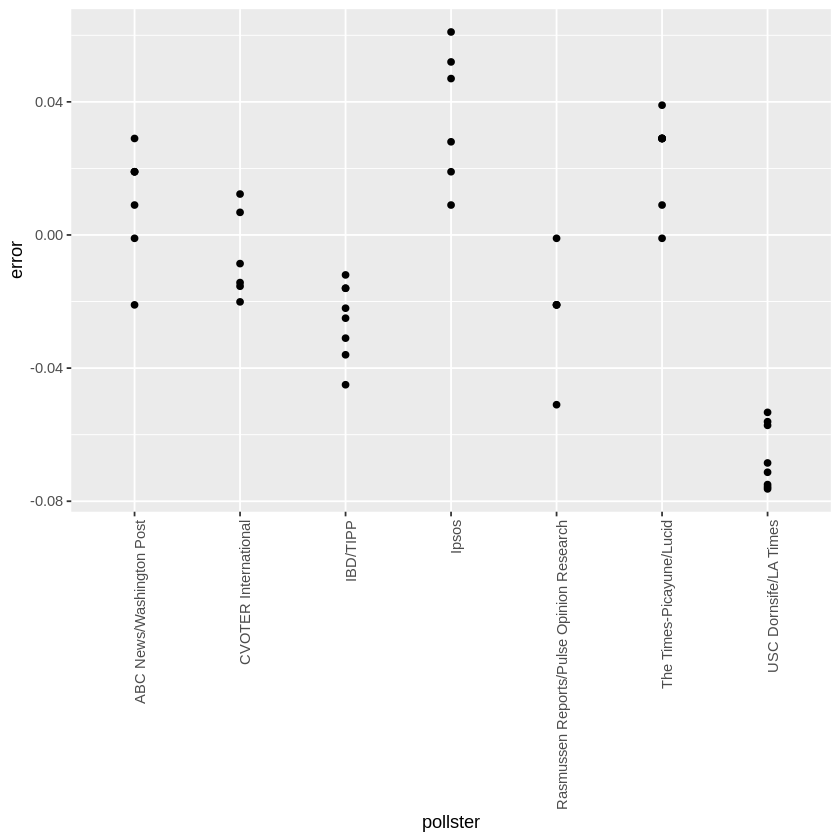

In [58]:

# Add variable called `error` to the object `polls` that contains the difference between d_hat and the actual difference on election day. Then make a plot of the error stratified by pollster, but only for pollsters who took 5 or more polls.
#Group by thiết lập mối quan hệ giữ các biến
polls %>% mutate(error = d_hat - 0.021) %>%
  group_by(pollster) %>%
  filter(n() >= 5) %>%
  ggplot(aes(pollster, error)) +
  geom_point() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))